In [1]:
import numpy as np
import matplotlib
import matplotlib.pylab as plt
import tensorflow as tf
%matplotlib inline
%config InlineBackend.figure_format='retina'
matplotlib.rcParams['figure.figsize'] = (12, 8)

### 1. 다음 데이터를 잘 표현하는 회귀 모델을 찾으시오.

$$y = f(x)$$

In [2]:
data = np.load('./nn_reg1.npz')
x_train = data['x_train']
y_train = data['y_train']
x_test = data['x_test']
y_test = data['y_test']

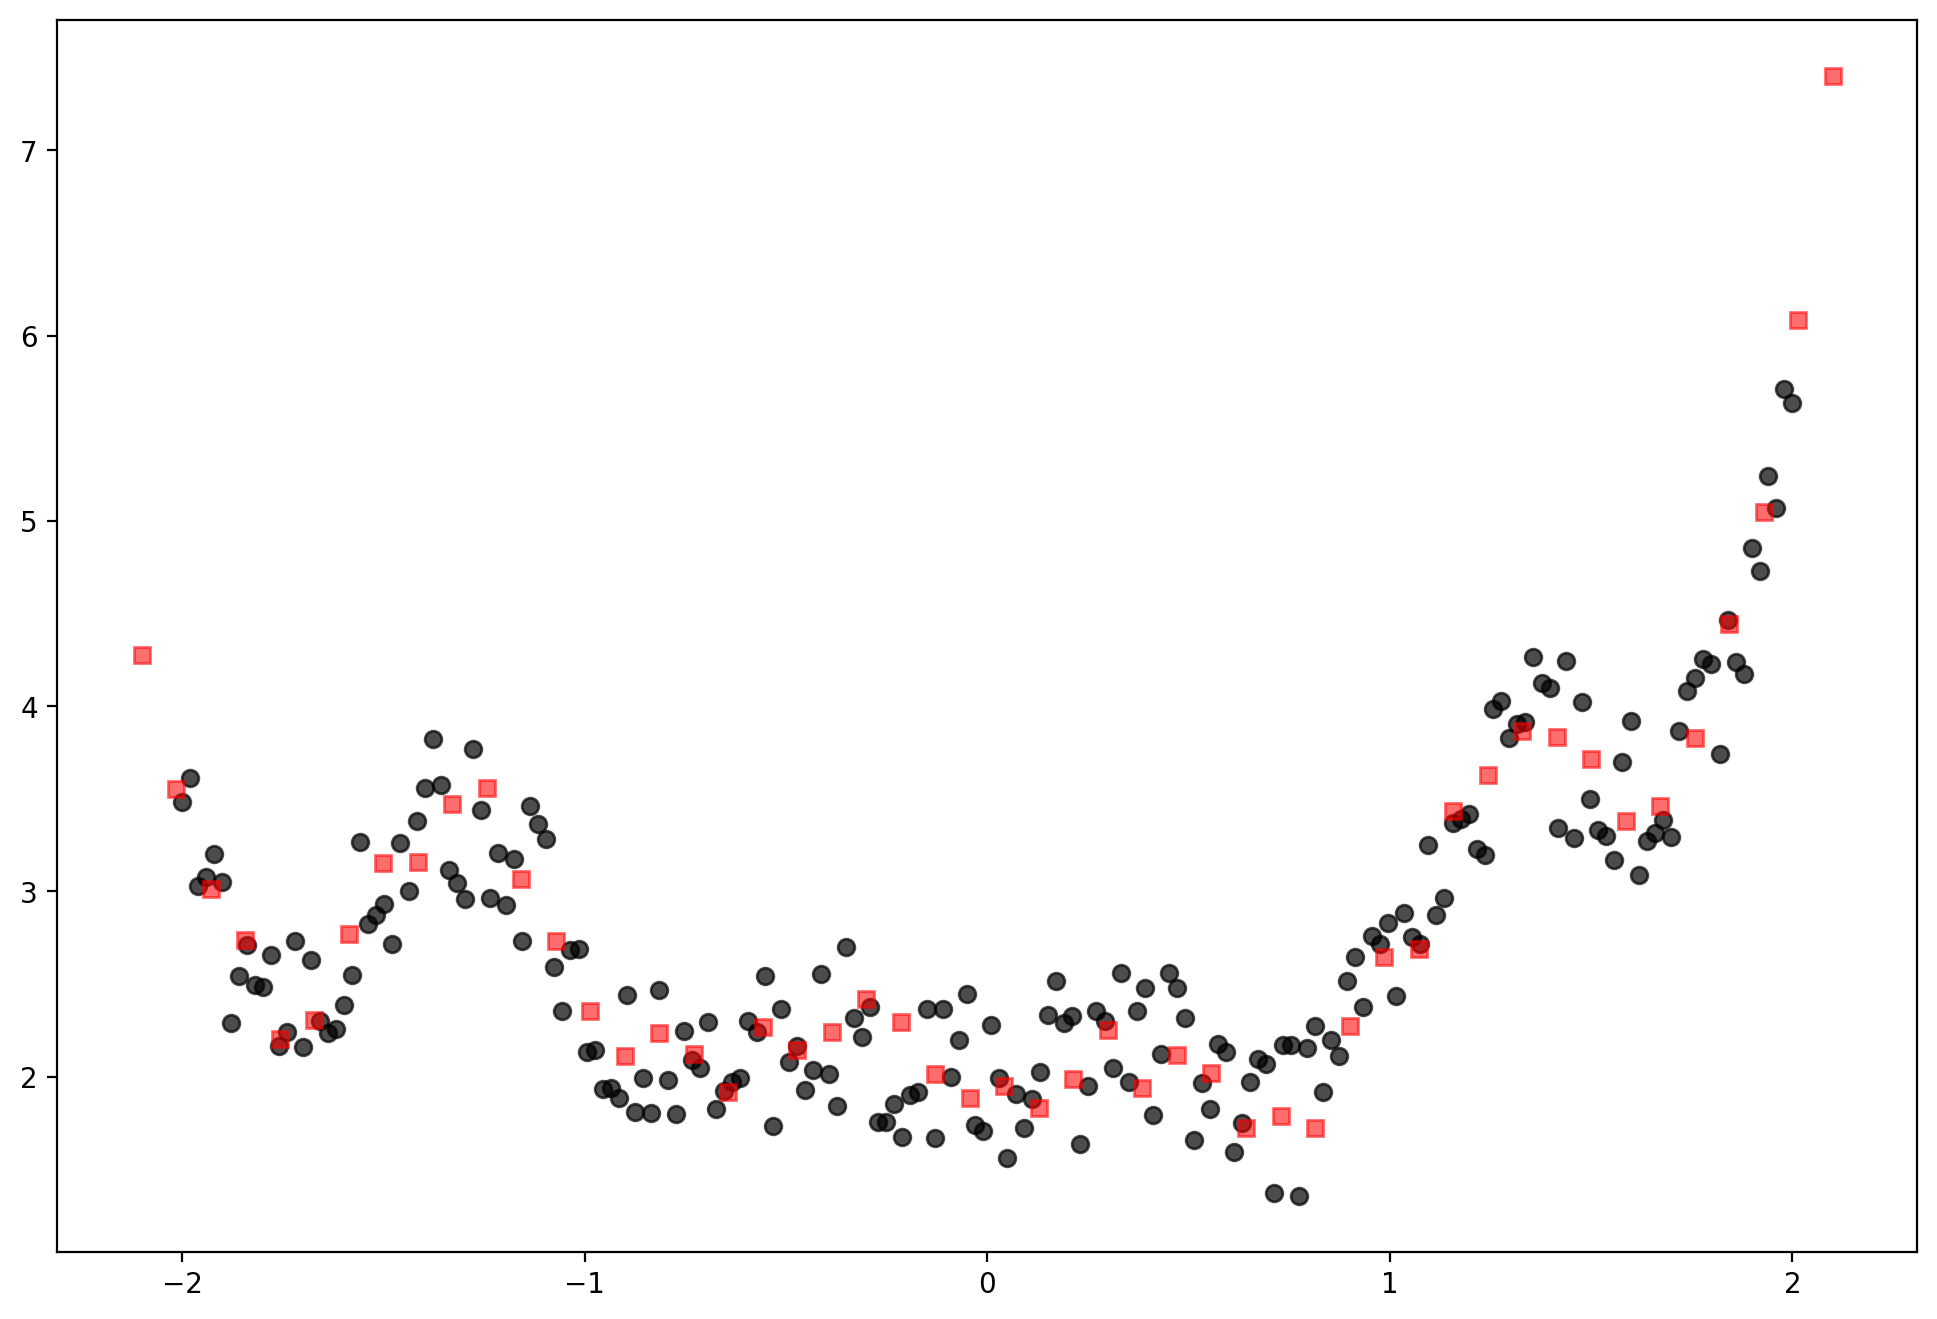

In [3]:
plt.plot(x_train,y_train,'ok', alpha = 0.7)
plt.plot(x_test,y_test,'rs', alpha=0.57)

In [4]:
features = np.array([[xval] for xval in x_train])
labels = np.array([[yval] for yval in y_train])

class MyModel(tf.keras.Model):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        num_hidden1 = 3000
        num_hidden2 = 3000
        num_hidden3 = 3000
        num_hidden4 = 3000
        
        self.W1 = tf.Variable(tf.random.normal([1,num_hidden1], seed = 2023), name ='weight1')
        self.b1 = tf.Variable(tf.zeros([num_hidden1]), name = 'bias1')
        
        self.W2 = tf.Variable(tf.random.normal([num_hidden1,num_hidden2], seed = 2023), name ='weight2')
        self.b2 = tf.Variable(tf.zeros([num_hidden2]), name = 'bias2')
        
        self.W3 = tf.Variable(tf.random.normal([num_hidden2,num_hidden3], seed = 2023), name ='weight3')
        self.b3 = tf.Variable(tf.zeros([num_hidden3]), name = 'bias3')
        
        self.W4 = tf.Variable(tf.random.normal([num_hidden2,num_hidden3], seed = 2023), name ='weight4')
        self.b4 = tf.Variable(tf.zeros([num_hidden3]), name = 'bias4')
        
        self.W5 = tf.Variable(tf.random.normal([num_hidden2,1], seed = 2023), name ='weight5')
        self.b5 = tf.Variable(tf.zeros([1]), name = 'bias5')
    
    def call(self, x):
        l1 = tf.matmul(x, self.W1) + self.b1
        h1 = tf.nn.tanh(l1)
        
        l2 = tf.matmul(h1, self.W2) + self.b2
        h2 = tf.nn.tanh(l2)
        
        l3 = tf.matmul(h2, self.W3) + self.b3
        h3 = tf.nn.tanh(l3)
        
        l4 = tf.matmul(h3, self.W4) + self.b4
        h4 = tf.nn.tanh(l4)
        
        yhat = tf.matmul(h4, self.W5) + self.b5
        return yhat


In [5]:
Epochs = 2000
batch_size = 512
lr = 0.001
optimizer = tf.keras.optimizers.legacy.Adagrad(lr)
loss = tf.keras.losses.MeanSquaredError()

In [6]:
np.random.seed(20)
shuffled_Id = np.arange(0,len(x_train))
np.random.shuffle(shuffled_Id)
shuffled_x_train = features[shuffled_Id]
shuffled_y_train = labels[shuffled_Id]

In [7]:
model = MyModel()

In [8]:
model.compile(optimizer=optimizer, loss=loss)

In [9]:
data3 = np.load('./pb3.npz')
x_train3 = data3['x_train']
y_train3 = data3['y_train']
z_train3 = data3['z_train']
target = data3['target'] # t

In [10]:
history = model.fit(shuffled_x_train, shuffled_y_train, epochs = Epochs, batch_size = batch_size, shuffle = False, verbose='auto')

Epoch 1/2000
1/1 [==============================] - 0s 422ms/step - loss: 2861.7578
Epoch 2/2000
1/1 [==============================] - 0s 173ms/step - loss: 12041.5654
Epoch 3/2000
1/1 [==============================] - 0s 274ms/step - loss: 2490.3623
Epoch 4/2000
1/1 [==============================] - 0s 208ms/step - loss: 2522.2117
Epoch 5/2000
1/1 [==============================] - 0s 209ms/step - loss: 2851.4075
Epoch 6/2000
1/1 [==============================] - 0s 212ms/step - loss: 1735.8104
Epoch 7/2000
1/1 [==============================] - 0s 232ms/step - loss: 1615.6250
Epoch 8/2000
1/1 [==============================] - 0s 232ms/step - loss: 1672.2047
Epoch 9/2000
1/1 [==============================] - 0s 236ms/step - loss: 1380.3512
Epoch 10/2000
1/1 [==============================] - 0s 214ms/step - loss: 1433.8561
Epoch 11/2000
1/1 [==============================] - 0s 210ms/step - loss: 837.1611
Epoch 12/2000
1/1 [==============================] - 0s 209ms/step - loss:

1/1 [==============================] - 0s 220ms/step - loss: 0.0752
Epoch 101/2000
1/1 [==============================] - 0s 211ms/step - loss: 0.0699
Epoch 102/2000
1/1 [==============================] - 0s 214ms/step - loss: 0.0642
Epoch 103/2000
1/1 [==============================] - 0s 209ms/step - loss: 0.0597
Epoch 104/2000
1/1 [==============================] - 0s 211ms/step - loss: 0.0548
Epoch 105/2000
1/1 [==============================] - 0s 218ms/step - loss: 0.0508
Epoch 106/2000
1/1 [==============================] - 0s 212ms/step - loss: 0.0466
Epoch 107/2000
1/1 [==============================] - 0s 217ms/step - loss: 0.0430
Epoch 108/2000
1/1 [==============================] - 0s 211ms/step - loss: 0.0393
Epoch 109/2000
1/1 [==============================] - 0s 207ms/step - loss: 0.0361
Epoch 110/2000
1/1 [==============================] - 0s 205ms/step - loss: 0.0328
Epoch 111/2000
1/1 [==============================] - 0s 205ms/step - loss: 0.0300
Epoch 112/2000
1/1 

1/1 [==============================] - 0s 208ms/step - loss: 3.2284e-08
Epoch 291/2000
1/1 [==============================] - 0s 208ms/step - loss: 3.0827e-08
Epoch 292/2000
1/1 [==============================] - 0s 210ms/step - loss: 3.3935e-08
Epoch 293/2000
1/1 [==============================] - 0s 210ms/step - loss: 3.5328e-08
Epoch 294/2000
1/1 [==============================] - 0s 213ms/step - loss: 2.9604e-08
Epoch 295/2000
1/1 [==============================] - 0s 212ms/step - loss: 3.1096e-08
Epoch 296/2000
1/1 [==============================] - 0s 216ms/step - loss: 2.9250e-08
Epoch 297/2000
1/1 [==============================] - 0s 212ms/step - loss: 3.1139e-08
Epoch 298/2000
1/1 [==============================] - 0s 210ms/step - loss: 3.5214e-08
Epoch 299/2000
1/1 [==============================] - 0s 206ms/step - loss: 3.4050e-08
Epoch 300/2000
1/1 [==============================] - 0s 207ms/step - loss: 3.3615e-08
Epoch 301/2000
1/1 [==============================] - 0s 2

1/1 [==============================] - 0s 209ms/step - loss: 2.4965e-08
Epoch 479/2000
1/1 [==============================] - 0s 213ms/step - loss: 2.5466e-08
Epoch 480/2000
1/1 [==============================] - 0s 210ms/step - loss: 2.7568e-08
Epoch 481/2000
1/1 [==============================] - 0s 211ms/step - loss: 2.5596e-08
Epoch 482/2000
1/1 [==============================] - 0s 210ms/step - loss: 2.8869e-08
Epoch 483/2000
1/1 [==============================] - 0s 216ms/step - loss: 2.6336e-08
Epoch 484/2000
1/1 [==============================] - 0s 211ms/step - loss: 2.5072e-08
Epoch 485/2000
1/1 [==============================] - 0s 215ms/step - loss: 2.2857e-08
Epoch 486/2000
1/1 [==============================] - 0s 207ms/step - loss: 2.3370e-08
Epoch 487/2000
1/1 [==============================] - 0s 212ms/step - loss: 2.2103e-08
Epoch 488/2000
1/1 [==============================] - 0s 209ms/step - loss: 2.3660e-08
Epoch 489/2000
1/1 [==============================] - 0s 2

1/1 [==============================] - 0s 204ms/step - loss: 2.6127e-08
Epoch 667/2000
1/1 [==============================] - 0s 204ms/step - loss: 2.2891e-08
Epoch 668/2000
1/1 [==============================] - 0s 206ms/step - loss: 2.6850e-08
Epoch 669/2000
1/1 [==============================] - 0s 206ms/step - loss: 2.2418e-08
Epoch 670/2000
1/1 [==============================] - 0s 205ms/step - loss: 2.4507e-08
Epoch 671/2000
1/1 [==============================] - 0s 204ms/step - loss: 2.9030e-08
Epoch 672/2000
1/1 [==============================] - 0s 204ms/step - loss: 2.7495e-08
Epoch 673/2000
1/1 [==============================] - 0s 206ms/step - loss: 2.1345e-08
Epoch 674/2000
1/1 [==============================] - 0s 206ms/step - loss: 2.2660e-08
Epoch 675/2000
1/1 [==============================] - 0s 202ms/step - loss: 2.1470e-08
Epoch 676/2000
1/1 [==============================] - 0s 205ms/step - loss: 2.1449e-08
Epoch 677/2000
1/1 [==============================] - 0s 2

1/1 [==============================] - 0s 201ms/step - loss: 2.6690e-08
Epoch 855/2000
1/1 [==============================] - 0s 201ms/step - loss: 2.6767e-08
Epoch 856/2000
1/1 [==============================] - 0s 200ms/step - loss: 2.4802e-08
Epoch 857/2000
1/1 [==============================] - 0s 201ms/step - loss: 2.5984e-08
Epoch 858/2000
1/1 [==============================] - 0s 199ms/step - loss: 2.2931e-08
Epoch 859/2000
1/1 [==============================] - 0s 204ms/step - loss: 2.1465e-08
Epoch 860/2000
1/1 [==============================] - 0s 201ms/step - loss: 2.3975e-08
Epoch 861/2000
1/1 [==============================] - 0s 201ms/step - loss: 2.5222e-08
Epoch 862/2000
1/1 [==============================] - 0s 204ms/step - loss: 2.7074e-08
Epoch 863/2000
1/1 [==============================] - 0s 200ms/step - loss: 2.7324e-08
Epoch 864/2000
1/1 [==============================] - 0s 202ms/step - loss: 2.6335e-08
Epoch 865/2000
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 224ms/step - loss: 2.4230e-08
Epoch 1042/2000
1/1 [==============================] - 0s 249ms/step - loss: 2.6464e-08
Epoch 1043/2000
1/1 [==============================] - 0s 225ms/step - loss: 2.4819e-08
Epoch 1044/2000
1/1 [==============================] - 0s 233ms/step - loss: 2.4670e-08
Epoch 1045/2000
1/1 [==============================] - 0s 240ms/step - loss: 2.2255e-08
Epoch 1046/2000
1/1 [==============================] - 0s 228ms/step - loss: 2.4897e-08
Epoch 1047/2000
1/1 [==============================] - 0s 218ms/step - loss: 2.1874e-08
Epoch 1048/2000
1/1 [==============================] - 0s 236ms/step - loss: 1.9800e-08
Epoch 1049/2000
1/1 [==============================] - 0s 218ms/step - loss: 1.9833e-08
Epoch 1050/2000
1/1 [==============================] - 0s 217ms/step - loss: 2.3830e-08
Epoch 1051/2000
1/1 [==============================] - 0s 227ms/step - loss: 2.3241e-08
Epoch 1052/2000
1/1 [===========================

1/1 [==============================] - 0s 210ms/step - loss: 2.5305e-08
Epoch 1228/2000
1/1 [==============================] - 0s 212ms/step - loss: 2.1932e-08
Epoch 1229/2000
1/1 [==============================] - 0s 212ms/step - loss: 2.4099e-08
Epoch 1230/2000
1/1 [==============================] - 0s 213ms/step - loss: 2.4547e-08
Epoch 1231/2000
1/1 [==============================] - 0s 210ms/step - loss: 2.2994e-08
Epoch 1232/2000
1/1 [==============================] - 0s 216ms/step - loss: 2.5113e-08
Epoch 1233/2000
1/1 [==============================] - 0s 213ms/step - loss: 2.3866e-08
Epoch 1234/2000
1/1 [==============================] - 0s 215ms/step - loss: 2.8659e-08
Epoch 1235/2000
1/1 [==============================] - 0s 210ms/step - loss: 2.5435e-08
Epoch 1236/2000
1/1 [==============================] - 0s 211ms/step - loss: 2.2839e-08
Epoch 1237/2000
1/1 [==============================] - 0s 213ms/step - loss: 2.2713e-08
Epoch 1238/2000
1/1 [===========================

1/1 [==============================] - 0s 222ms/step - loss: 2.2055e-08
Epoch 1414/2000
1/1 [==============================] - 0s 227ms/step - loss: 2.2334e-08
Epoch 1415/2000
1/1 [==============================] - 0s 270ms/step - loss: 2.1018e-08
Epoch 1416/2000
1/1 [==============================] - 0s 223ms/step - loss: 2.1341e-08
Epoch 1417/2000
1/1 [==============================] - 0s 222ms/step - loss: 2.3230e-08
Epoch 1418/2000
1/1 [==============================] - 0s 227ms/step - loss: 2.1803e-08
Epoch 1419/2000
1/1 [==============================] - 0s 227ms/step - loss: 2.2504e-08
Epoch 1420/2000
1/1 [==============================] - 0s 218ms/step - loss: 2.2869e-08
Epoch 1421/2000
1/1 [==============================] - 0s 214ms/step - loss: 2.1092e-08
Epoch 1422/2000
1/1 [==============================] - 0s 218ms/step - loss: 1.8083e-08
Epoch 1423/2000
1/1 [==============================] - 0s 214ms/step - loss: 1.8495e-08
Epoch 1424/2000
1/1 [===========================

1/1 [==============================] - 0s 208ms/step - loss: 2.3353e-08
Epoch 1600/2000
1/1 [==============================] - 0s 208ms/step - loss: 2.2621e-08
Epoch 1601/2000
1/1 [==============================] - 0s 208ms/step - loss: 2.3310e-08
Epoch 1602/2000
1/1 [==============================] - 0s 209ms/step - loss: 2.2221e-08
Epoch 1603/2000
1/1 [==============================] - 0s 208ms/step - loss: 2.1588e-08
Epoch 1604/2000
1/1 [==============================] - 0s 209ms/step - loss: 2.2671e-08
Epoch 1605/2000
1/1 [==============================] - 0s 213ms/step - loss: 2.3862e-08
Epoch 1606/2000
1/1 [==============================] - 0s 205ms/step - loss: 2.1917e-08
Epoch 1607/2000
1/1 [==============================] - 0s 209ms/step - loss: 2.1337e-08
Epoch 1608/2000
1/1 [==============================] - 0s 213ms/step - loss: 2.4590e-08
Epoch 1609/2000
1/1 [==============================] - 0s 211ms/step - loss: 2.2356e-08
Epoch 1610/2000
1/1 [===========================

1/1 [==============================] - 0s 209ms/step - loss: 2.2775e-08
Epoch 1786/2000
1/1 [==============================] - 0s 209ms/step - loss: 2.3406e-08
Epoch 1787/2000
1/1 [==============================] - 0s 209ms/step - loss: 2.7312e-08
Epoch 1788/2000
1/1 [==============================] - 0s 209ms/step - loss: 2.6423e-08
Epoch 1789/2000
1/1 [==============================] - 0s 210ms/step - loss: 2.7173e-08
Epoch 1790/2000
1/1 [==============================] - 0s 217ms/step - loss: 2.3133e-08
Epoch 1791/2000
1/1 [==============================] - 0s 240ms/step - loss: 2.3098e-08
Epoch 1792/2000
1/1 [==============================] - 0s 237ms/step - loss: 2.5477e-08
Epoch 1793/2000
1/1 [==============================] - 0s 240ms/step - loss: 2.1573e-08
Epoch 1794/2000
1/1 [==============================] - 0s 282ms/step - loss: 2.4490e-08
Epoch 1795/2000
1/1 [==============================] - 0s 274ms/step - loss: 2.2436e-08
Epoch 1796/2000
1/1 [===========================

1/1 [==============================] - 0s 318ms/step - loss: 2.3802e-08
Epoch 1972/2000
1/1 [==============================] - 0s 330ms/step - loss: 2.2950e-08
Epoch 1973/2000
1/1 [==============================] - 0s 302ms/step - loss: 2.5756e-08
Epoch 1974/2000
1/1 [==============================] - 0s 245ms/step - loss: 2.4760e-08
Epoch 1975/2000
1/1 [==============================] - 0s 247ms/step - loss: 2.3846e-08
Epoch 1976/2000
1/1 [==============================] - 0s 233ms/step - loss: 2.2294e-08
Epoch 1977/2000
1/1 [==============================] - 0s 228ms/step - loss: 2.2075e-08
Epoch 1978/2000
1/1 [==============================] - 0s 229ms/step - loss: 2.2886e-08
Epoch 1979/2000
1/1 [==============================] - 0s 216ms/step - loss: 2.1433e-08
Epoch 1980/2000
1/1 [==============================] - 0s 217ms/step - loss: 2.5978e-08
Epoch 1981/2000
1/1 [==============================] - 0s 237ms/step - loss: 2.7113e-08
Epoch 1982/2000
1/1 [===========================

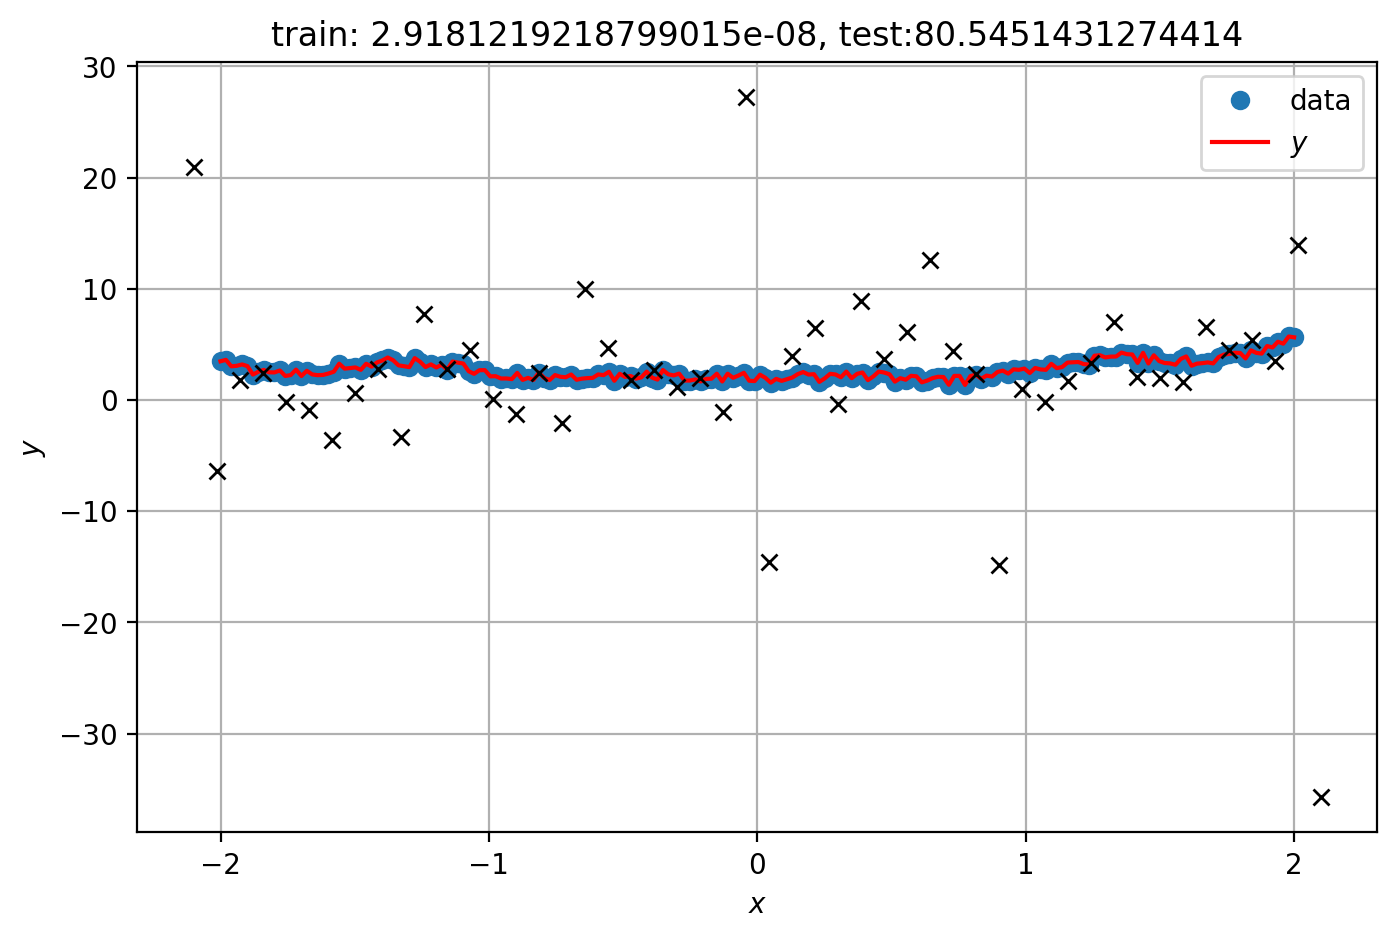

In [11]:
yhat_= model(features)
yhat2 = model(x_test.reshape(-1,1))
loss2 = loss(y_test.reshape(-1,1),yhat2.numpy())
ax = plt.subplots(figsize=(8,5))
plt.plot(x_train, y_train, 'o')
plt.plot(features, yhat_.numpy(), 'r')
plt.plot(x_test.reshape(-1,1), yhat2.numpy(), 'kx')

plt.grid()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('train: {}, test:{}'.format(history.history['loss'][-1],loss2))
plt.legend(['data', '$y$'])

In [12]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 27018001 (103.07 MB)
Trainable params: 27018001 (103.07 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
